In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import math
from matplotlib import colors

### Gaussian Noise

(-0.5, 297.5, 249.5, -0.5)

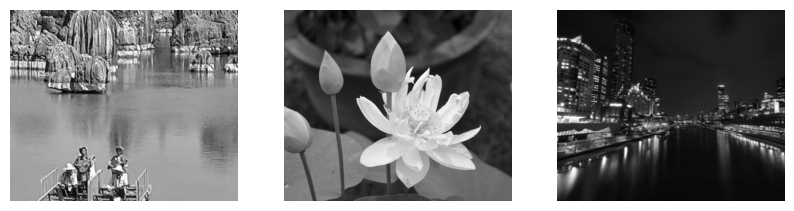

In [41]:
img2 = cv2.imread('Picture2.jpg')
img3 = cv2.imread('Picture3.jpg')
img5 = cv2.imread('Picture5.jpg')

img2_rgb = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
img3_rgb = cv2.cvtColor(img3, cv2.COLOR_BGR2RGB)
img5_rgb = cv2.cvtColor(img5, cv2.COLOR_BGR2RGB)

img2_greyscale = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
img3_greyscale = cv2.cvtColor(img3, cv2.COLOR_BGR2GRAY)
img5_greyscale = cv2.cvtColor(img5, cv2.COLOR_BGR2GRAY)

fig, axes = plt.subplots(1, 3, figsize=(10, 4))
axes[0].imshow(img2_greyscale, cmap='gray')
axes[0].axis('off')

axes[1].imshow(img3_greyscale, cmap='gray')
axes[1].axis('off')

axes[2].imshow(img5_greyscale, cmap='gray')
axes[2].axis('off')

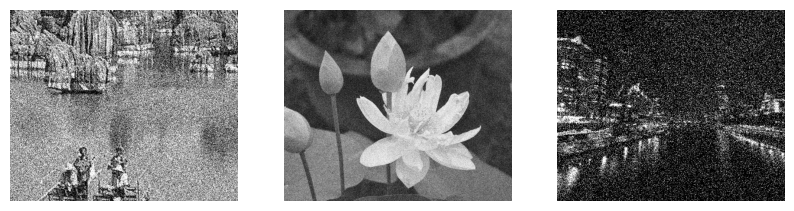

In [39]:
def add_gaussian_noise(image, mean=0, sigma=25):
    """Add Gaussian noise to an image."""
    gauss = np.random.normal(mean, sigma, image.shape).astype(np.float32)
    noisy_image = image.astype(np.float32) + gauss
    noisy_image = np.clip(noisy_image, 0, 255).astype(np.uint8)
    return noisy_image

img2_noisy = add_gaussian_noise(img2_greyscale, sigma=50)
img3_noisy = add_gaussian_noise(img3_greyscale, sigma=50)
img5_noisy = add_gaussian_noise(img5_greyscale, sigma=50)

fig, axes = plt.subplots(1, 3, figsize=(10, 4)) 
axes[0].imshow(img2_noisy, cmap='gray')
axes[0].axis('off')
axes[1].imshow(img3_noisy, cmap='gray')
axes[1].axis('off')
axes[2].imshow(img5_noisy, cmap='gray')
axes[2].axis('off')
plt.show()

### Impulse Noise

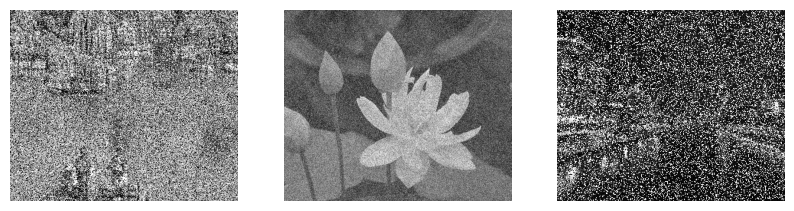

In [38]:
def impulse_noise(image, prob=0.05):
    """Add impulse noise to an image."""
    noisy_image = np.copy(image)
    rand = np.random.rand(*image.shape)
    noisy_image[rand < prob] = 0
    noisy_image[rand > 1 - prob] = 255
    return noisy_image

img2_impulse = impulse_noise(img2_greyscale, prob=0.2)
img3_impulse = impulse_noise(img3_greyscale, prob=0.2)
img5_impulse = impulse_noise(img5_greyscale, prob=0.2)

fig, axes = plt.subplots(1, 3, figsize=(10, 4))
axes[0].imshow(img2_impulse,cmap='gray')
axes[0].axis('off')
axes[1].imshow(img3_impulse,cmap='gray')
axes[1].axis('off')
axes[2].imshow(img5_impulse,cmap='gray')
axes[2].axis('off')
plt.show()

### Poisson Noise

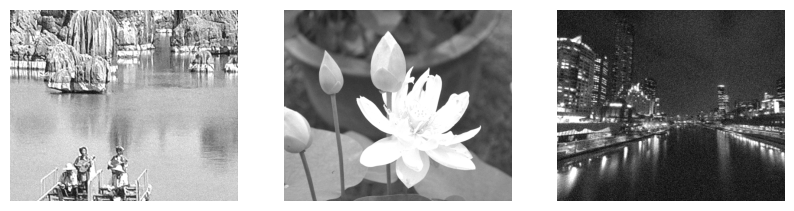

In [37]:
def poisson_noise(image, lam=4):
    poisson = np.random.poisson(lam, size=image.shape).astype(np.float32)
    noisy_image = image.astype(np.float32) + poisson
    noisy_image = np.clip(noisy_image, 0, 255).astype(np.uint8)
    return noisy_image

img2_poisson = poisson_noise(img2_greyscale, 50)
img3_poisson = poisson_noise(img3_greyscale, 50)
img5_poisson = poisson_noise(img5_greyscale, 50)

fig, axes = plt.subplots(1, 3, figsize=(10, 4))
axes[0].imshow(img2_poisson, cmap='gray')
axes[0].axis('off')
axes[1].imshow(img3_poisson, cmap='gray')
axes[1].axis('off')
axes[2].imshow(img5_poisson, cmap='gray')
axes[2].axis('off')
plt.show()

#Variance and mean are the same

### Uniform Noise

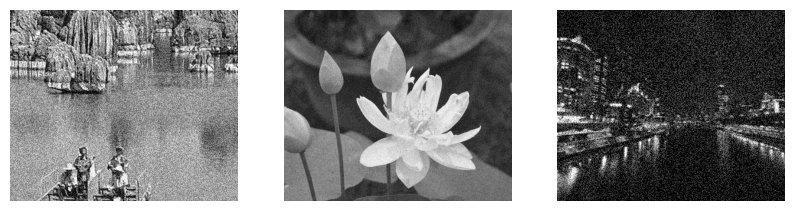

In [35]:
def uniform_noise(image, mean=0, var=25):
    a = mean - np.sqrt(3 * var)
    b = mean + np.sqrt(3 * var)

    uniform = np.random.uniform(a, b, size=image.shape).astype(np.float32)

    noisy_image = image.astype(np.float32) + uniform
    noisy_image = np.clip(noisy_image, 0, 255).astype(np.uint8)
    return noisy_image

img2_uniform = uniform_noise(img2_greyscale,var=1000)
img3_uniform = uniform_noise(img3_greyscale,var=1000)
img5_uniform = uniform_noise(img5_greyscale,var=1000)

fig, axes = plt.subplots(1, 3, figsize=(10, 4))
axes[0].imshow(img2_uniform, cmap='gray')
axes[0].axis('off')
axes[1].imshow(img3_uniform, cmap='gray')
axes[1].axis('off')
axes[2].imshow(img5_uniform, cmap='gray')
axes[2].axis('off')
plt.show()



### Rayleigh Noise

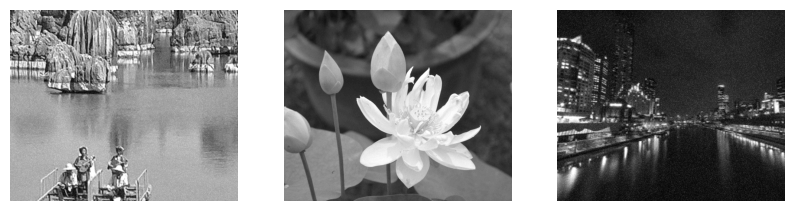

In [36]:
def rayleigh_noise(image, var=1):
    sigma = math.sqrt(var)
    rayleigh= np.random.rayleigh(sigma, size=image.shape).astype(np.float32)
    noisy_image = image.astype(np.float32) + rayleigh
    noisy_image = np.clip(noisy_image, 0, 255).astype(np.uint8)
    mean = sigma * math.sqrt(math.pi / 2)
    return noisy_image

img2_rayleigh=rayleigh_noise(img2_greyscale,100)
img3_rayleigh=rayleigh_noise(img3_greyscale,100)
img5_rayleigh=rayleigh_noise(img5_greyscale,100)

fig, axes = plt.subplots(1, 3, figsize=(10, 4))
axes[0].imshow(img2_rayleigh, cmap='gray')
axes[0].axis('off')
axes[1].imshow(img3_rayleigh, cmap='gray')
axes[1].axis('off')
axes[2].imshow(img5_rayleigh, cmap='gray')
axes[2].axis('off')
plt.show()

## Paramater estimation

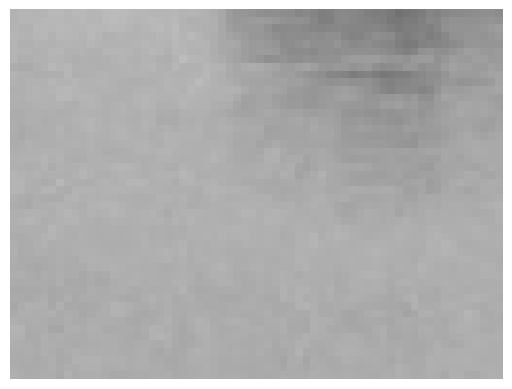

In [53]:
img = cv2.imread('noise.png')


plt.imshow(img, cmap='gray')
plt.axis('off')
plt.show()

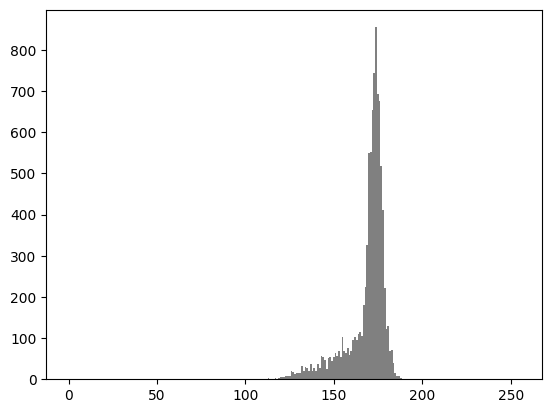

In [54]:
plt.hist(img.ravel(), bins=256, range=(0, 255), color='gray')
plt.show()

Type: Rayleigh or Gaussian

In [68]:
from scipy.stats import norm

# Flatten to 1D
pixels = img.ravel()

# Fit normal distribution
mu, sigma = norm.fit(pixels)

print("Original mean (μ):", mu)
print("Standard deviation (σ):", sigma)

Original mean (μ): 168.77604166666666
Standard deviation (σ): 11.434595439859859


### Mean filter

(-0.5, 397.5, 333.5, -0.5)

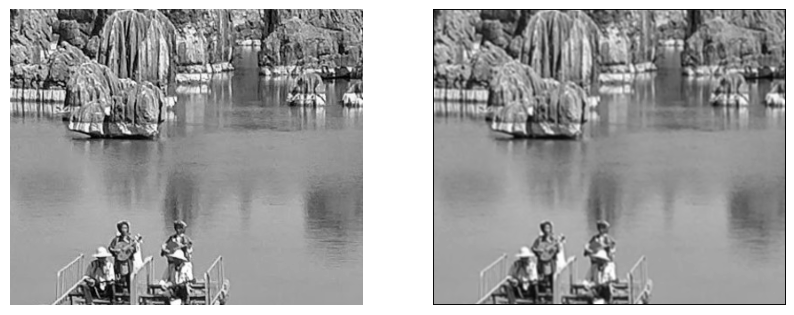

In [72]:
def mean_filter(image):
    h, w = image.shape
    mask = np.ones((3, 3), dtype=float) / 9
    img_new = np.zeros((h, w), dtype=float)
    
    for i in range(1, h-1):
        for j in range(1, w-1):
            new_pixel = (
                image[i-1, j-1]*mask[0,0] + image[i-1, j]*mask[0,1] + image[i-1, j+1]*mask[0,2] +
                image[i, j-1]*mask[1,0]   + image[i, j]*mask[1,1]   + image[i, j+1]*mask[1,2] +
                image[i+1, j-1]*mask[2,0] + image[i+1, j]*mask[2,1] + image[i+1, j+1]*mask[2,2]
            )
            img_new[i, j] = new_pixel
    
    return img_new

# Apply mean filter
img_mean = mean_filter(img2_greyscale)

fig, axes = plt.subplots(1, 2, figsize=(10, 4))
axes[0].imshow(img2_greyscale, cmap='gray')
axes[0].axis('off')

axes[1].imshow(img_mean, cmap='gray')
axes[1].axis('off')

### Weighted

(-0.5, 397.5, 333.5, -0.5)

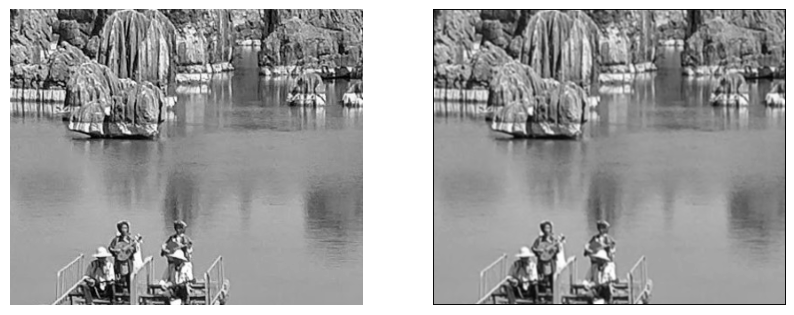

In [74]:
def weighted_filter(image):
    h, w = image.shape
    mask = np.array([[1, 2, 1],
                     [2, 4, 2],
                     [1, 2, 1]], dtype=float)
    mask = mask / mask.sum()
    img_new = np.zeros((h, w), dtype=float)
    
    for i in range(1, h-1):
        for j in range(1, w-1):
            new_pixel = (
                image[i-1, j-1]*mask[0,0] + image[i-1, j]*mask[0,1] + image[i-1, j+1]*mask[0,2] +
                image[i, j-1]*mask[1,0]   + image[i, j]*mask[1,1]   + image[i, j+1]*mask[1,2] +
                image[i+1, j-1]*mask[2,0] + image[i+1, j]*mask[2,1] + image[i+1, j+1]*mask[2,2]
            )
            img_new[i, j] = new_pixel
    
    return img_new

# Apply mean filter
img_weight = weighted_filter(img2_greyscale)

fig, axes = plt.subplots(1, 2, figsize=(10, 4))
axes[0].imshow(img2_greyscale, cmap='gray')
axes[0].axis('off')

axes[1].imshow(img_weight, cmap='gray')
axes[1].axis('off')

### Geometric Filter